In [1]:
# All imports here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import joblib
from sklearn.tree import plot_tree

# Importing excel sheets as dfs, should both have samples in the same order
predictors_df = pd.read_excel('../Predictors_Cleaned.xlsx', 0)
    # Rows are samples, columns are predictors
outcomes_df = pd.read_excel('../Outcomes_Cleaned.xlsx', 0)
    # Rows are samples, columns are mechanisms

# Dropping unnecessary metadata
X = predictors_df.drop('SAMPLE NAME', axis=1)
Y = outcomes_df.drop('MECHANISM', axis=1) # Full DF must iterate through
feature_names = X.columns

# Storing model scores
r2_list = []
oob_list = []

# List of columns for iterating
columns = list(Y)
# print(predictors_df) # 211 x 33
# print(outcomes_df) # 211 x 41


In [2]:
# DO NOT RUN ON MY PC IT WILL MAYBE EXPLODE

# Iterate through each class of genes
for i in columns:
    
    # resetting the r2 and best model value for each column
    r2 = 0
    best_model = RandomForestRegressor()
    
    # Iterate through common proportions of test/train data
    for j in [0.2, 0.4, 0.6, 0.8]:

        # Split Data
        x_train, x_test, y_train, y_test = train_test_split(X, Y[i], test_size=j) 

        # Iterate through common n_estimators
        for k in [100, 500, 1000]:

            # Create model
            rf = RandomForestRegressor(n_estimators=k, random_state=0, oob_score=True)
            rf = rf.fit(x_train, y_train)

            # Find model r squared
            predictions = rf.predict(x_test)
            new_r2 = abs(r2_score(y_test, predictions)) # using absolute value for comparision

            # Compare model, if model r2 is over 1 then its very bad fit so we don't save it
            if new_r2 <= 1:
                if new_r2 > r2:
                    r2 = new_r2
                    # Saving the better model
                    best_model = rf
                    # Saving best model params for visualization
                    best_x_test = x_test
                    best_y_test = y_test
    
    # Finally dumping the best model for the class
    joblib.dump(best_model, f"Models/rf_{i}.joblib")
    
    # Storing highest r2 and oob scores
    r2_list.append(r2)
    oob_list.append(best_model.oob_score_)

    # Visualizing feature importance
    feature_importance = permutation_importance(best_model, best_x_test, best_y_test, random_state=0)
    forest_importances = pd.Series(feature_importance.importances_mean, index=feature_names)

    # Plot feature importance
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=feature_importance.importances_std, ax=ax) # adds std bar
    ax.set_title(f"{k} Permutation Feature Importances")
    ax.set_ylabel("Mean Accuracy Decrease")

    # Saving the figure
    plt.savefig(f'Features/{i}_features.png')
    plt.close()
    
    # Printing highest r2 value and oob
    print(f"{i} r2: {r2}\n{i} oob score: {best_model.oob_score_}")



Lipopeptides r2: 0.23764828707361174
Lipopeptides oob score: 0.026452573022726633


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Arsenic_resistance r2: 0.3951628521583823
Arsenic_resistance oob score: 0.20286592632042644


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Copper_resistance r2: 0.2483375917609758
Copper_resistance oob score: -0.23571975589316274


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)


Rifampin r2: 0.24524465535582296
Rifampin oob score: -0.3181208329454157


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Trimethoprim r2: 0.23240380175293007
Trimethoprim oob score: 0.08267621586993845
Tellurim_resistance r2: 0.8328378109253634
Tellurim_resistance oob score: 0.017704064432178312


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Zinc_resistance r2: 0.4023884446702164
Zinc_resistance oob score: 0.1283618553492516


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)


Peroxide_resistance r2: 0.2131089725691223
Peroxide_resistance oob score: -0.3051714873669642


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Multi-drug_resistance r2: 0.2205107321877401
Multi-drug_resistance oob score: -0.022508495756776492


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Acid_resistance r2: 0.9133475007365908
Acid_resistance oob score: -0.06489595912777602
Phenolic_compound_resistance r2: 0.13211771958491547
Phenolic_compound_resistance oob score: -0.20924749737152992
Mupirocin r2: 0.025000000000000133
Mupirocin oob score: 1.0


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Nucleosides r2: 0.1787607152143651
Nucleosides oob score: -0.17170566343295102


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Aldehyde_resistance r2: 0.3825003803150291
Aldehyde_resistance oob score: -0.03578080335636269
Paraquat_resistance r2: 0.9826945980563337
Paraquat_resistance oob score: -0.0007992437076884684


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Betalactams r2: 0.47874709637367097
Betalactams oob score: 0.2021665637442519


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Tetracyclines r2: 0.20762977662296822
Tetracyclines oob score: 0.2953737316206767
Nickel_resistance r2: 0.2733791161046917
Nickel_resistance oob score: -0.01212784598351746


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Multibiocide_resistance r2: 0.4446979783693553
Multibiocide_resistance oob score: 0.2573091924199441


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Aminoglycoside r2: 0.2788367389545533
Aminoglycoside oob score: 0.20202550896751714


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

MLS r2: 0.6821069198050178
MLS oob score: -0.016158398335099466


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Fluoroquinolones r2: 0.24590593845715636
Fluoroquinolones oob score: -0.07691504967629736


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Fosfomycin r2: 0.2910497191160285
Fosfomycin oob score: 0.1110641688057572


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Phenicol_resistance r2: 0.24838454745732175
Phenicol_resistance oob score: 0.14630692814611035


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Drug_and_biocide_resistance r2: 0.4530597086822643
Drug_and_biocide_resistance oob score: 0.1502260399369003


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Multimetal_resistance r2: 0.266818761103895
Multimetal_resistance oob score: 0.23510334452745274


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Mercury_resistance r2: 0.2892622731226244
Mercury_resistance oob score: -0.21244008668802783


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Glycopeptides r2: 0.5784742018127325
Glycopeptides oob score: 0.22430260021781157


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Sulfonamides r2: 0.6245092437120581
Sulfonamides oob score: -0.16313577703774484


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Drug_and_biocide_and_metal_resistance r2: 0.5015883195897333
Drug_and_biocide_and_metal_resistance oob score: 0.06321847801642066


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Cationic_microbial_peptides r2: 0.35282541145970536
Cationic_microbial_peptides oob score: 0.26832617780038015


/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
/home/mour/.loc

Biocide_and_metal_resistance r2: 0.30055081402602013
Biocide_and_metal_resistance oob score: 0.004585273927246392
Iron_resistance r2: 0.8320015468772837
Iron_resistance oob score: -1.187299429512525
Biguanide_resistance r2: 0.10154369778514094
Biguanide_resistance oob score: -0.16840917619825357
Metronidazole r2: 0.9237896533373022
Metronidazole oob score: -0.37014759661569796
Acetate_resistance r2: 0.7735510353094002
Acetate_resistance oob score: -0.04401144746561947
Bacitracin r2: 0.0735173465682668
Bacitracin oob score: -0.20393999301226007
Sodium_resistance r2: 0.6232737578734013
Sodium_resistance oob score: -0.3342606912077264
Chromium_resistance r2: 0.3233051786885246
Chromium_resistance oob score: -0.4839847512167501
QACS r2: 0.37360505471907657
QACS oob score: -0.16578782113333057


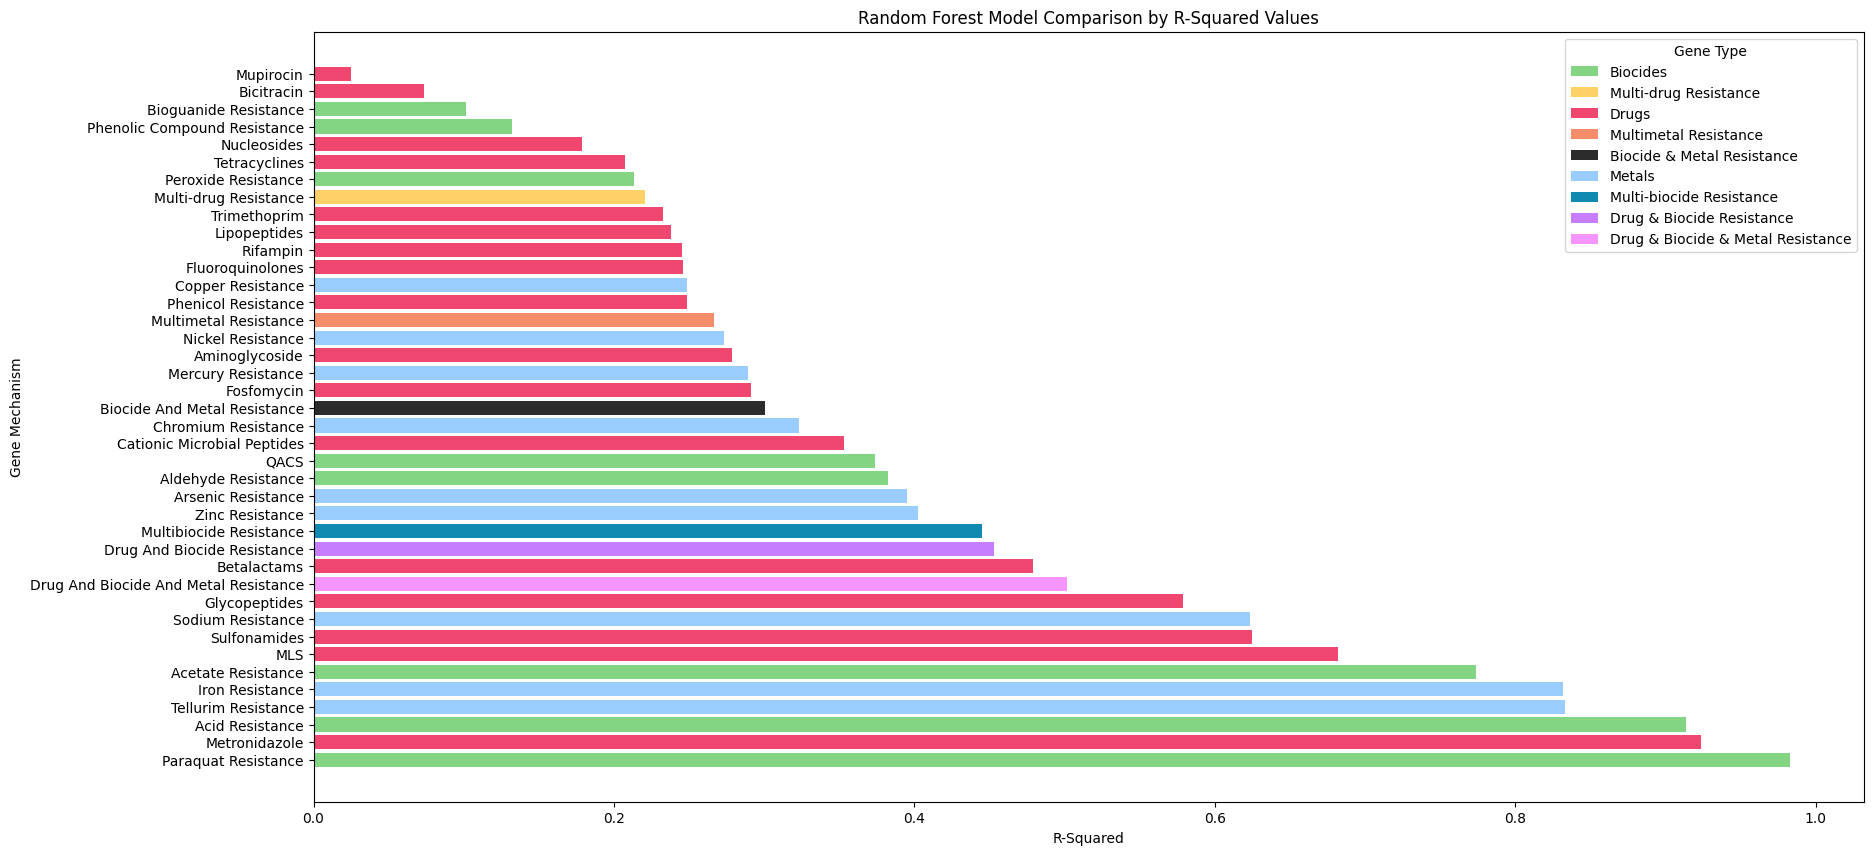

Figure 1: Random Forest model comparison for 40 gene mechanism frequency prediction models. Models are compared via the absolute values of their r-squared values displayed on the x-axis and sorted from least to greatest. The Y-axis labels the gene mechanisms that each model is predicting the frequency of. Models are additionally color-coded by gene type, which is displayed in the legend.


In [3]:
# Plotting an overall comparision of different models and their r2 scores
# Order and compare the accuracy of models depending on drug/metal/biociode/multicompound types etc
import numpy as np

fig, ax = plt.subplots(figsize=(20,10))

# Sorting r2 values for visualization
sorted_idx = np.argsort(r2_list)
r2_array = np.array(r2_list)

# Sorting colors for visualization
bar_labels = ['Drugs', 'Metals', '_Metals', '_Drugs', '_Drugs', '_Metals', '_Metals', 'Biocides', 'Multi-drug Resistance', '_Biocides', '_Biocides', '_Drugs', '_Drugs', '_Biocides', '_Biocides', '_Drugs', '_Drugs', '_Metals', 'Multi-biocide Resistance', '_Drugs', '_Drugs', '_Drugs', '_Drugs', '_Drugs', 'Drug & Biocide Resistance', 'Multimetal Resistance', '_Metals', '_Drugs', '_Drugs', 'Drug & Biocide & Metal Resistance', '_Drugs', 'Biocide & Metal Resistance', '_Metals', '_Biocides', '_Drugs', '_Biocides', '_Drugs', '_Metals', '_Metals', '_Biocides']
formatted_genes = ['Lipopeptides', 'Arsenic Resistance', 'Copper Resistance', 'Rifampin',
       'Trimethoprim', 'Tellurim Resistance', 'Zinc Resistance',
       'Peroxide Resistance', 'Multi-drug Resistance', 'Acid Resistance',
       'Phenolic Compound Resistance', 'Mupirocin', 'Nucleosides',
       'Aldehyde Resistance', 'Paraquat Resistance', 'Betalactams',
       'Tetracyclines', 'Nickel Resistance', 'Multibiocide Resistance',
       'Aminoglycoside', 'MLS', 'Fluoroquinolones', 'Fosfomycin',
       'Phenicol Resistance', 'Drug And Biocide Resistance',
       'Multimetal Resistance', 'Mercury Resistance', 'Glycopeptides',
       'Sulfonamides', 'Drug And Biocide And Metal Resistance',
       'Cationic Microbial Peptides', 'Biocide And Metal Resistance',
       'Iron Resistance', 'Bioguanide Resistance', 'Metronidazole',
       'Acetate Resistance', 'Bicitracin', 'Sodium Resistance',
       'Chromium Resistance', 'QACS']
formatted_genes = np.array(formatted_genes)

drug_color = '#ef476f'
metal_color = '#99ccff'
biocide_color = '#83d483'
multi_drug_color = '#ffd166'
multi_metal_color = '#f78c6b'
multi_biocide_color = '#118ab2'
drug_biocide_color = '#c77dff'
drug_biocide_metal_color = "#f695ff"
metal_biocide_color = "#2C2C2C"

bar_colors = [f'{drug_color}', f'{metal_color}', f'{metal_color}', f'{drug_color}', f'{drug_color}', f'{metal_color}', f'{metal_color}', f'{biocide_color}', f'{multi_drug_color}', f'{biocide_color}', f'{biocide_color}', f'{drug_color}', f'{drug_color}', f'{biocide_color}', f'{biocide_color}', f'{drug_color}', f'{drug_color}', f'{metal_color}', f'{multi_biocide_color}', f'{drug_color}', f'{drug_color}', f'{drug_color}', f'{drug_color}', f'{drug_color}', f'{drug_biocide_color}', f'{multi_metal_color}', f'{metal_color}', f'{drug_color}', f'{drug_color}', f'{drug_biocide_metal_color}', f'{drug_color}', f'{metal_biocide_color}', f'{metal_color}', f'{biocide_color}', f'{drug_color}', f'{biocide_color}', f'{drug_color}', f'{metal_color}', f'{metal_color}', f'{biocide_color}']
# [f'tab:{drug_color}', f'tab:{metal_color}', f'tab:{metal_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{metal_color}', f'tab:{metal_color}', f'tab:{biocide_color}', f'tab:{multi_drug_color}', f'tab:{biocide_color}', f'tab:{biocide_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{biocide_color}', f'tab:{biocide_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{metal_color}', f'tab:{multi_biocide_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{drug_biocide_color}', f'tab:{multi_metal_color}', f'tab:{metal_color}', f'tab:{drug_color}', f'tab:{drug_color}', f'tab:{drug_biocide_metal_color}', f'tab:{drug_color}', f'tab:{metal_biocide_color}', f'tab:{metal_color}', f'tab:{biocide_color}', f'tab:{drug_color}', f'tab:{biocide_color}', f'tab:{drug_color}', f'tab:{metal_color}', f'tab:{metal_color}', f'tab:{biocide_color}']

# Plotting graph
ax.barh(formatted_genes[sorted_idx], r2_array[sorted_idx], align='center', label=np.array(bar_labels)[sorted_idx], color=np.array(bar_colors)[sorted_idx])
# ax.barh(np.arange(len(columns)), r2_list, align='center') # old code
ax.set_yticks(np.arange(len(columns)), labels=formatted_genes[sorted_idx])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('R-Squared')
ax.set_ylabel('Gene Mechanism')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_title('Random Forest Model Comparison by R-Squared Values')
ax.legend(title='Gene Type')

plt.savefig(f'rf_r2_graph.png')
plt.show()

print("Figure 1: Random Forest model comparison for 40 gene mechanism frequency prediction models. Models are compared via the absolute values of their r-squared values displayed on the x-axis and sorted from least to greatest. The Y-axis labels the gene mechanisms that each model is predicting the frequency of. Models are additionally color-coded by gene type, which is displayed in the legend.")

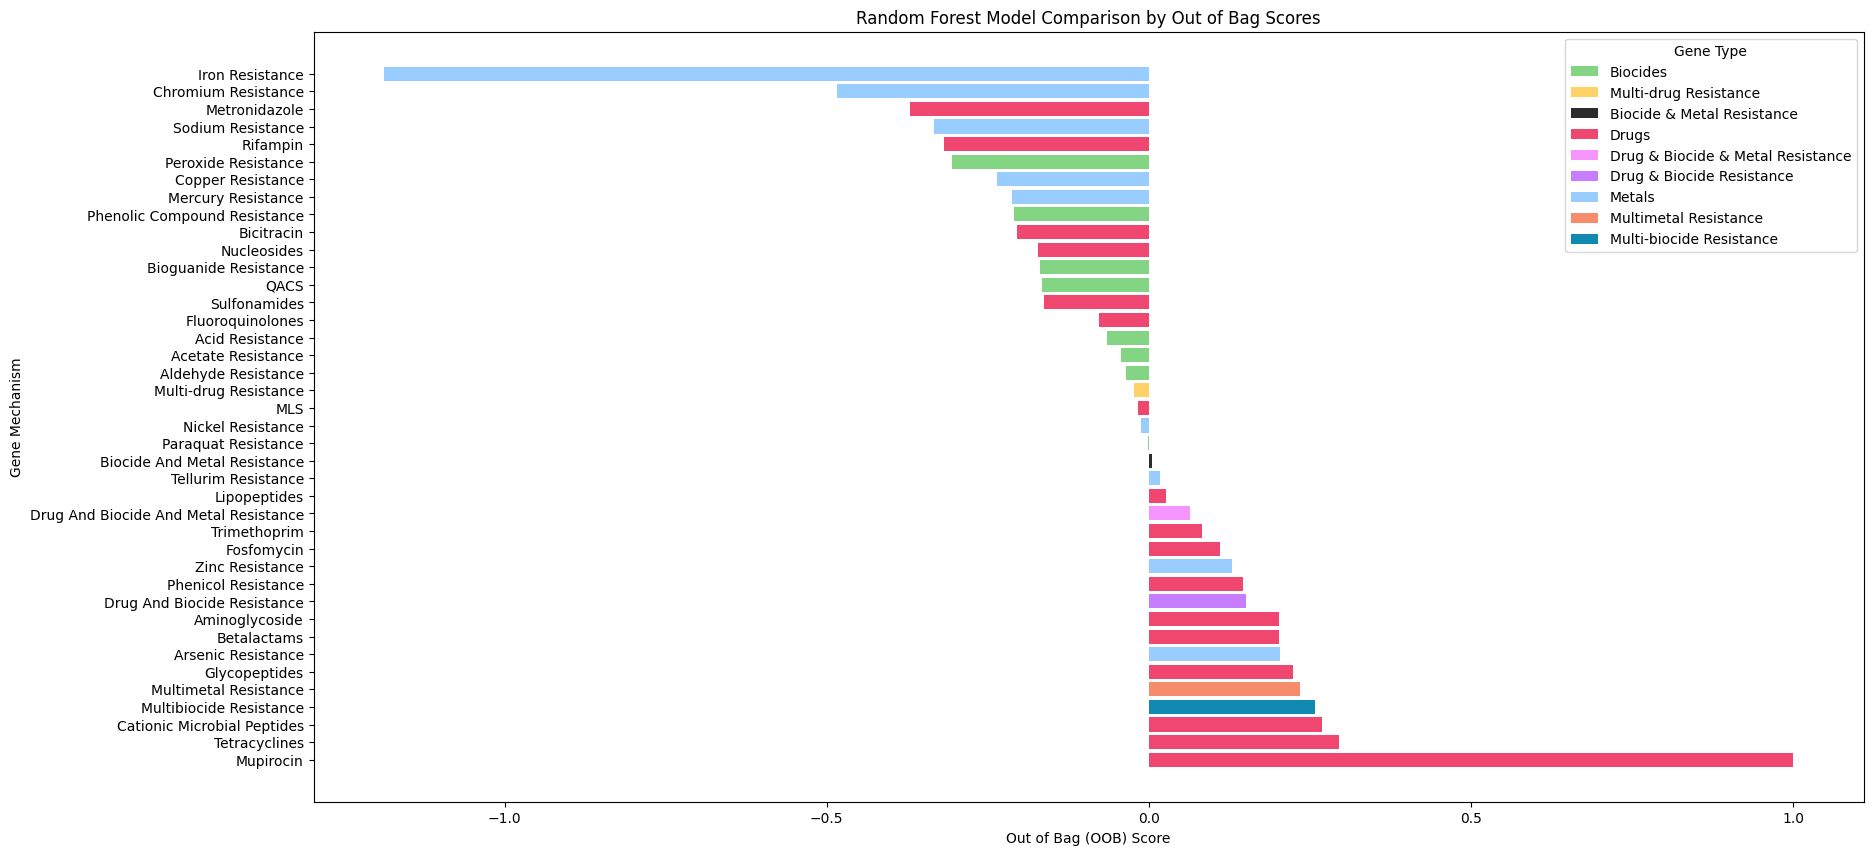

In [4]:
# Plotting an overall comparision of different models and their oob scores
sorted_idx = np.argsort(oob_list)
oob_array = np.array(oob_list)

fig, ax = plt.subplots(figsize=(20,10))

# Plotting graph
ax.barh(formatted_genes[sorted_idx], oob_array[sorted_idx], align='center', label=np.array(bar_labels)[sorted_idx], color=np.array(bar_colors)[sorted_idx])
# ax.barh(np.arange(len(columns)), r2_list, align='center') # old code
ax.set_yticks(np.arange(len(columns)), labels=formatted_genes[sorted_idx])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Out of Bag (OOB) Score')
ax.set_ylabel('Gene Mechanism')
# plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_title('Random Forest Model Comparison by Out of Bag Scores')
ax.legend(title='Gene Type')

plt.savefig(f'rf_oob_graph.png')
plt.show()